In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
a = pd.read_csv('D:\Universita\2 anno magistrale\Progetto BioInf\miRNA_to_age\datasets\preprocessed\genes_reads.csv')
b = pd.read_csv('D:\Universita\2 anno magistrale\Progetto BioInf\miRNA_to_age\datasets\preprocessed\genes_reads(RPM).csv')

In [5]:
x = np.array([0.62352941, 0.61870504, 0.56547619, 0.45070423, 0.69642857, 0.54545455, 0.72, 0.55844156, 0.64197531, 0.47773279])
print(x.std())

0.08274377349871569


  coefs  values
3     D      -1
1     B      -2
0     A       3
4     E      -3
2     C       5


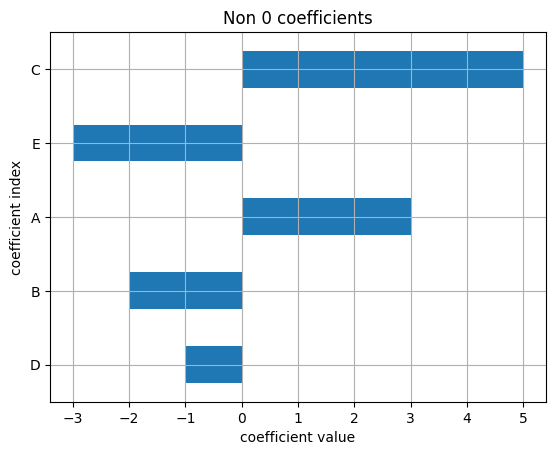

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
x = {'A':3, 'B':-2, 'C':5, 'D':-1, 'E':-3}
df = pd.DataFrame({"coefs":x.keys(), "values":x.values()})
df = df.sort_values(by='values', key=abs, ascending=True)
print(df)
fig, ax = plt.subplots()
df.plot.barh(y='values', x='coefs', ax=ax, legend=False)
ax.set_title('Non 0 coefficients')
ax.set_xlabel('coefficient value')
ax.set_ylabel('coefficient index')
ax.grid(True)